In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report,r2_score, mean_squared_error




# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import StratifiedKFold # For creating folds
from sklearn.model_selection import ShuffleSplit, KFold

# Import Package to implement GridSearch CV (Hyperparameter Tuning Method 1)
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV (Hyperparameter Tuning Method 2)
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time
import math
import pickle

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_bike = pd.read_csv('bike_lab7.csv')

df_bike.shape[0]

731

In [3]:
df_bike_user = pd.read_csv('bike_user.csv')
df_bike_user.keys()

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [4]:
X_bike = df_bike.drop(columns = ['cnt'])
y_bike = df_bike['cnt']
regressor = DecisionTreeRegressor(random_state = 42)

In [5]:
cat_var_bike = ['season', 'mnth', 'holiday','weekday','workingday','weathersit']
X_bike_encoded = pd.get_dummies(X_bike, columns = cat_var_bike)

In [6]:
X_bike_encoded.keys()

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Apr', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_No', 'holiday_Yes',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_No',
       'workingday_Yes', 'weathersit_Clear or Few Clouds',
       'weathersit_Light Snow or Light Rain', 'weathersit_Mist and Cloudy'],
      dtype='object')

In [7]:
train_X_bike, test_X_bike, train_y_bike, test_y_bike = train_test_split(X_bike_encoded, y_bike, test_size = 0.2, random_state = 1)
folds_bike = KFold(n_splits=5, random_state=None, shuffle=False)

In [8]:
hyper_params_new_bike = {
    'max_depth': list(range(4, 12)),
    'min_samples_leaf': list(range(4, 12)),
    'min_samples_split': list(range(12, 23))
}

In [9]:
bike_random_cv = RandomizedSearchCV(estimator = regressor,
                                     param_distributions = hyper_params_new_bike,
                                     scoring = 'r2',
                                     cv = folds_bike,
                                     verbose = 1,
                                     n_jobs = -1,
                                     n_iter = 60, #set to 60 (randomly select 60 possible combinations of the hyperparameters)
                                     random_state = 100) #think setting seed


In [10]:
bike_random_cv.fit(train_X_bike, train_y_bike)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(random_state=42), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                                        'min_samples_leaf': [4, 5, 6, 7, 8, 9,
                                                             10, 11],
                                        'min_samples_split': [12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22]},
                   random_state=100, scoring='r2', verbose=1)

In [11]:
# Return set of parameters with the best performance
print(bike_random_cv.best_params_)

# Return the performance metric score
print(bike_random_cv.best_score_)

{'min_samples_split': 19, 'min_samples_leaf': 11, 'max_depth': 6}
0.5107849670157195


In [12]:
hyper_params_new_random_grid_bike = {
    'max_depth': list(range(16, 24)),
    'min_samples_leaf': list(range(8, 16)),
    'min_samples_split': list(range(3, 11))
}

bike_model_rand_grid_cv = GridSearchCV(estimator = regressor,
                        param_grid = hyper_params_new_random_grid_bike,
                        scoring= 'r2',
                        cv = folds_bike,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

In [13]:
bike_model_rand_grid_cv.fit(train_X_bike, train_y_bike)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [16, 17, 18, 19, 20, 21, 22, 23],
                         'min_samples_leaf': [8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='r2', verbose=1)

In [14]:
bestRegTree = bike_model_rand_grid_cv.best_estimator_

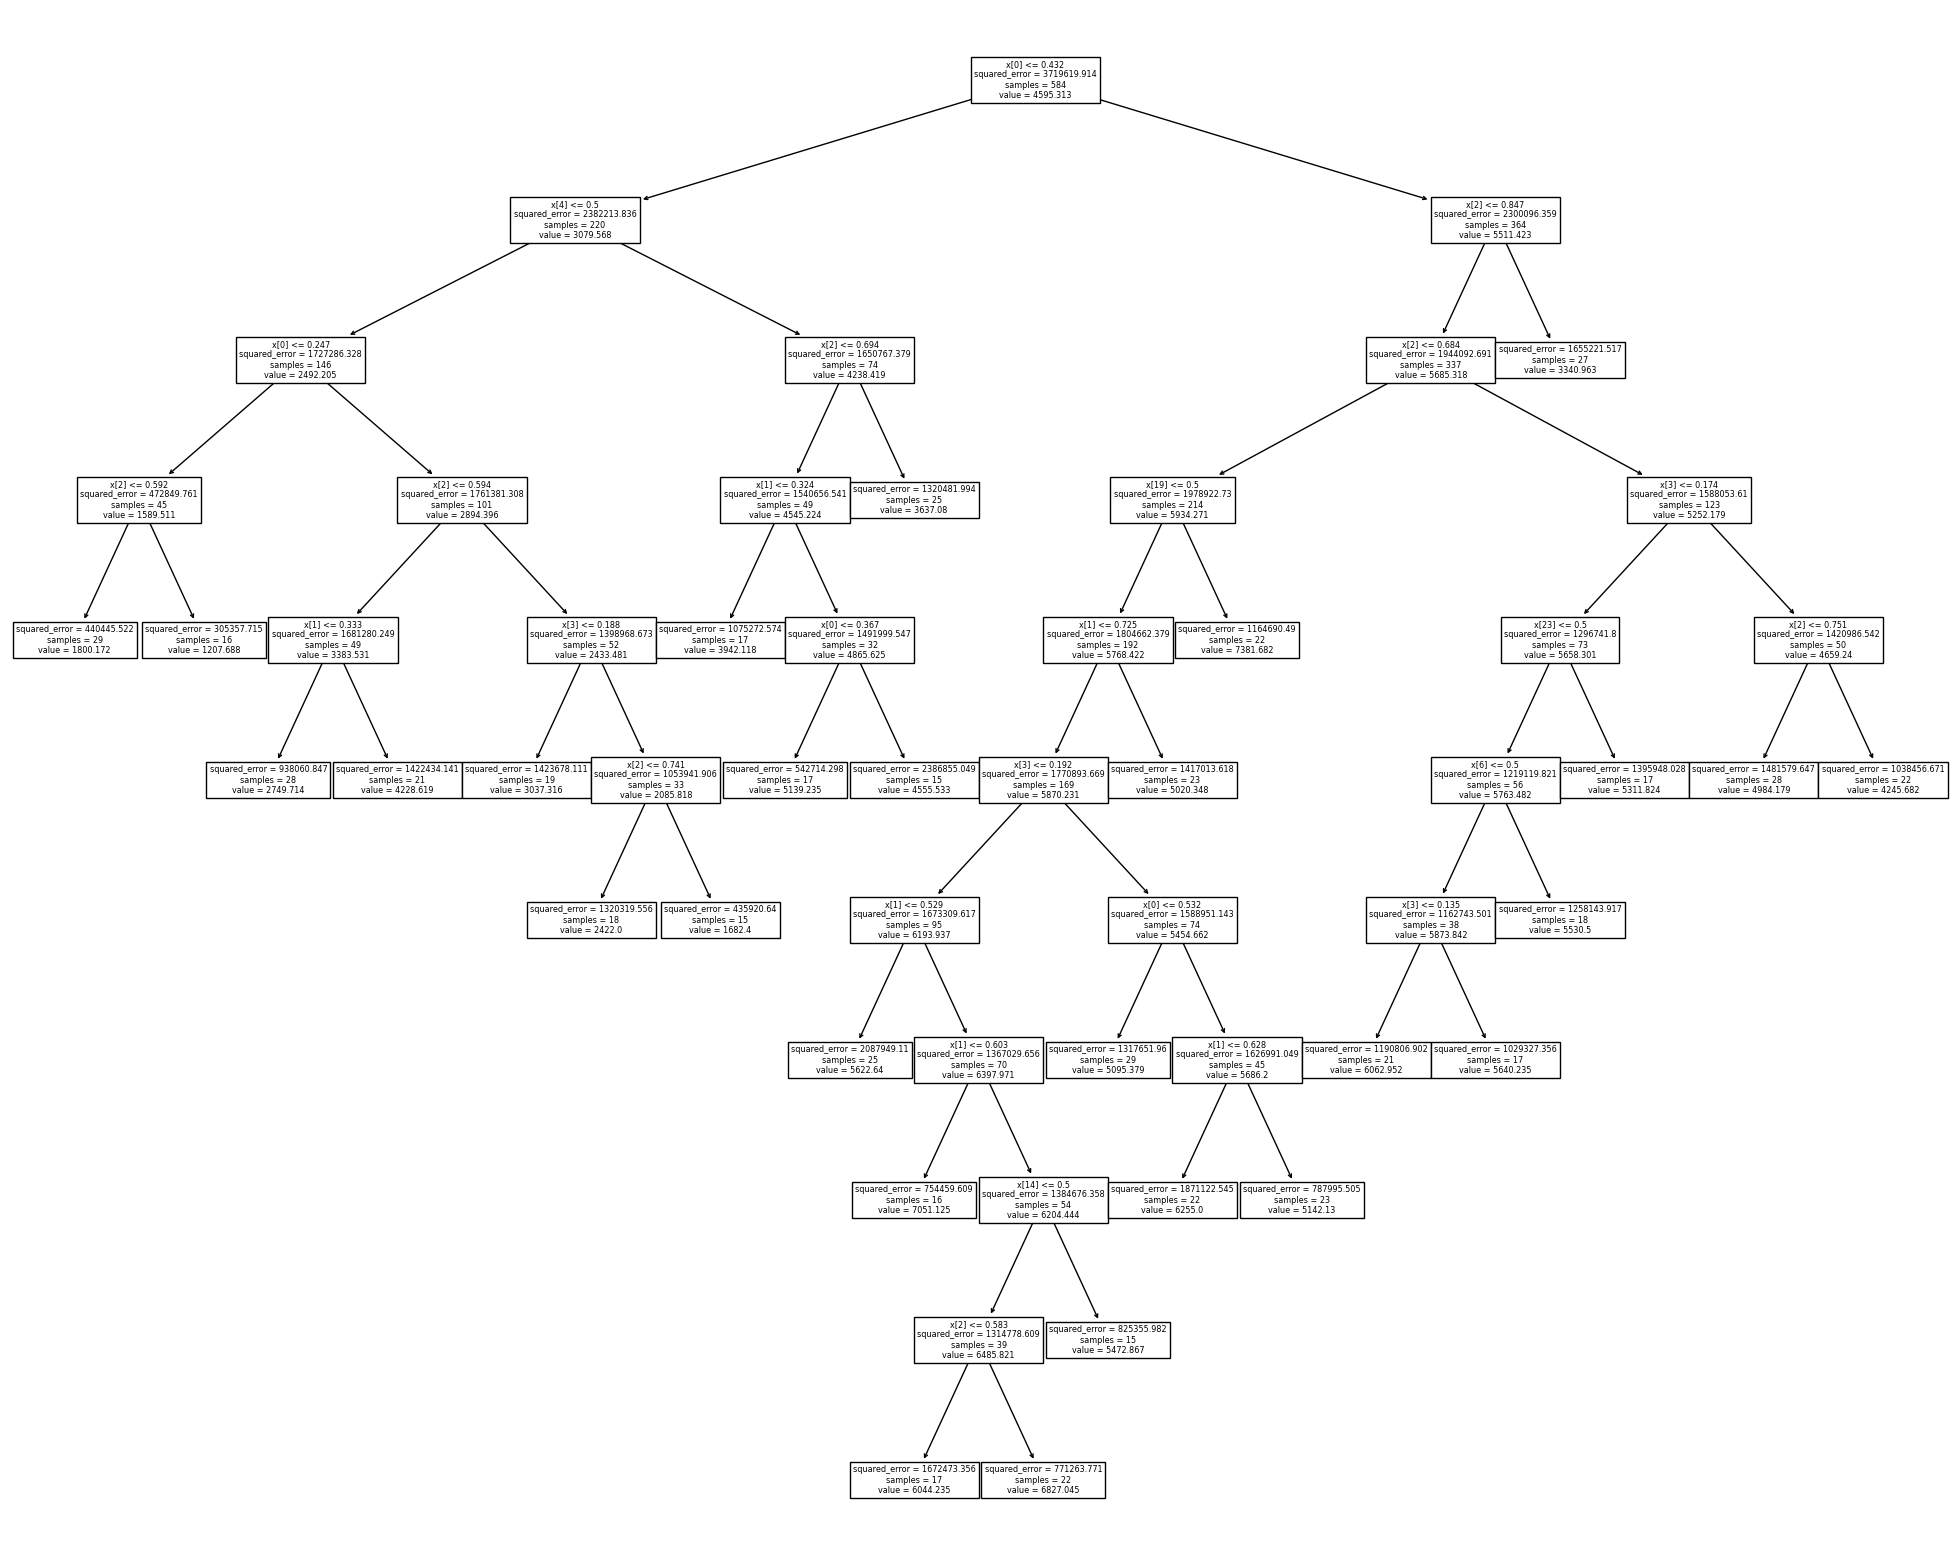

In [15]:
# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(bestRegTree)

In [16]:
importance = bestRegTree.feature_importances_ #gini index purity reduction

In [17]:
# Displaying feature importance as a dataframe
feature_imp_bike = pd.DataFrame(list(zip(train_X_bike.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_bike = feature_imp_bike.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp_bike

,Feature,Importance
0,temp,0.594107
1,hum,0.157127
2,season_Fall,0.101930
3,atemp,0.057303
4,windspeed,0.044209
5,mnth_Sep,0.034967
6,mnth_Jun,0.007566
7,weekday_Mon,0.001811
8,season_Summer,0.000980
9,weathersit_Clear or Few Clouds,0.000000


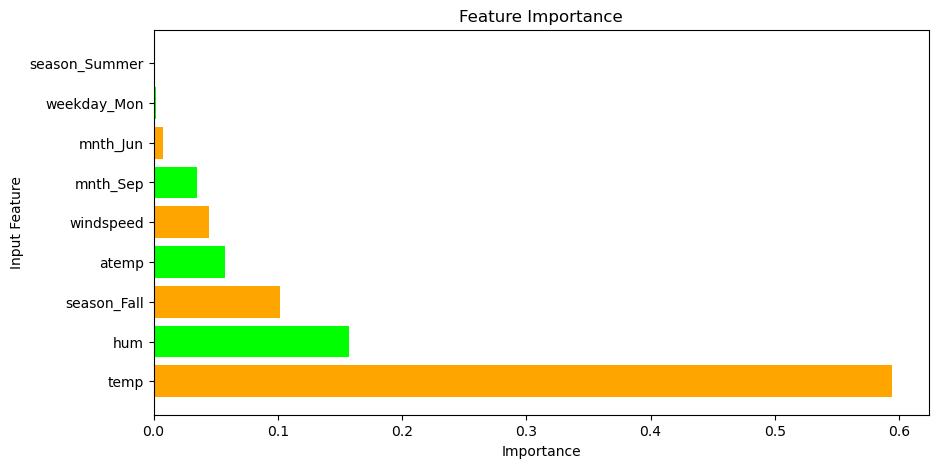

In [18]:
# Selecting features with non-zero importance values
feature_imp_nonzero_bike = feature_imp_bike[feature_imp_bike['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(10, 5), dpi = 100)
plt.barh(feature_imp_nonzero_bike['Feature'], feature_imp_nonzero_bike['Importance'], color = ['orange', 'lime'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");

In [19]:
# First pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_reg_bike.pickle', 'wb') 

# Write DT model to the file
pickle.dump(bestRegTree, dt_pickle) 

# Close the file
dt_pickle.close() 